<a href="https://colab.research.google.com/github/amathie5/projet-breast-cancer/blob/main/Copy_of_datascience_project_breastcancer_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
#CSV files importation
df1 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df3.csv')

#Concatening all dataframes together to be left with one unique dataframe
df = pd.concat([df1,df2,df3]).sort_values(by='year')
df_encoded = df.copy()

#Displaying the main informations of the dataframe
df.shape
display(df.head())
df.info()





,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,1,1,0,1,0,2,0,1,1,0,0,1
19,2005,1,1,0,0,9,4,0,1,9,9,9,1
18,2005,1,1,0,0,9,4,0,1,1,0,0,1
7,2005,1,1,0,0,4,2,0,1,1,0,0,1
6,2005,1,1,0,0,2,3,0,1,9,0,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   year                   1522340 non-null  int64
 1   age_group_5_years      1522340 non-null  int64
 2   race_eth               1522340 non-null  int64
 3   first_degree_hx        1522340 non-null  int64
 4   age_menarche           1522340 non-null  int64
 5   age_first_birth        1522340 non-null  int64
 6   BIRADS_breast_density  1522340 non-null  int64
 7   current_hrt            1522340 non-null  int64
 8   menopaus               1522340 non-null  int64
 9   bmi_group              1522340 non-null  int64
 10  biophx                 1522340 non-null  int64
 11  breast_cancer_history  1522340 non-null  int64
 12  count                  1522340 non-null  int64
dtypes: int64(13)
memory usage: 162.6 MB


In [ ]:
age_map = {1:'18-29',2:'30-34',3:'35-39',4:'40-44',5:'45-49',6:'50-54',7:'55-59',8:'60-64',9:'65-69',10:'70-74',11:'75-79',12:'80-84',13:'85+'}
race_map = {1:'non-hispanic white', 2:'non-hispanic black', 3:'asian/pacific islander', 4:'native american',5:'hispanic',6:'other/mixed',9:'unknown'}
familyhx_map = {0:'no', 1:'yes', 9:'unknown'}
menarche_map = {0:'14+',1:'12-13',2:'<12',9:'unknown'}
firstbirth_map = {0:'<20',1:'20-24',2:'25-29',3:'30+',4:'nulliparous',9:'unknown'}
BIRADS_map = {1:'fatty',2:'scattered',3:'heterogeneously dense', 4:'extremely dense', 5:'unknown'}
hrt_map = {0:'no', 1:'yes',9:'unknown'}
menopaus_map = {1:'pre-menopausal',2:'post-menopausal',3:'surgical menopause', 9:'unknown'}
bmi_map = {1:'10-24.99',2:'25-29.99',3:'30-34.99',4:'35+',9:'unknown'}
biophx_map = {0:'no',1:'yes', 9:'unknown'}
history_map = {0:'no',1:'yes',9:'unknown'}

#Replacing the code with the categories
df['age_group_5_years']=df['age_group_5_years'].map(age_map)
df['race_eth']=df['race_eth'].map(race_map)
df['first_degree_hx']=df['first_degree_hx'].map(familyhx_map)
df['age_menarche']=df['age_menarche'].map(age_map)
df['age_first_birth']=df['age_first_birth'].map(firstbirth_map)
df['BIRADS_breast_density']=df['BIRADS_breast_density'].map(BIRADS_map)
df['current_hrt']=df['current_hrt'].map(hrt_map)
df['menopaus']=df['menopaus'].map(menopaus_map)
df['bmi_group']=df['bmi_group'].map(bmi_map)
df['biophx']=df['biophx'].map(biophx_map)
df['breast_cancer_history']=df['breast_cancer_history'].map(history_map)

#convert as category
cat_cols = ['age_group_5_years','race_eth','first_degree_hx','age_menarche','age_first_birth','BIRADS_breast_density','current_hrt','menopaus','bmi_group','biophx','breast_cancer_history']
df[cat_cols] = df[cat_cols].astype('category')
display(df.head())
df.info()
df.isna().sum()




,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1
19,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,unknown,unknown,unknown,1
18,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,10-24.99,no,no,1
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,unknown,no,no,1


<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   year                   1522340 non-null  int64   
 1   age_group_5_years      1522340 non-null  category
 2   race_eth               1522340 non-null  category
 3   first_degree_hx        1522340 non-null  category
 4   age_menarche           1265795 non-null  category
 5   age_first_birth        1522340 non-null  category
 6   BIRADS_breast_density  1343329 non-null  category
 7   current_hrt            1522340 non-null  category
 8   menopaus               1522340 non-null  category
 9   bmi_group              1522340 non-null  category
 10  biophx                 1522340 non-null  category
 11  breast_cancer_history  1522340 non-null  category
 12  count                  1522340 non-null  int64   
dtypes: category(11), int64(2)
memory usage: 50.8 MB


,0
year,0
age_group_5_years,0
race_eth,0
first_degree_hx,0
age_menarche,256545
age_first_birth,0
BIRADS_breast_density,179011
current_hrt,0
menopaus,0
bmi_group,0


In [ ]:
#replace unknown values by nan
df = df.replace('unknown',np.nan)

#check for duplicates
print(df.duplicated().sum())

#the total number of observations should be 6'788'436
print(df['count'].sum())


/tmp/ipython-input-3569221684.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace('unknown',np.nan)


0
6788436


In [ ]:
#create two binary variables for high BIRADS and cancer history
df['BIRADS_high']=np.where(df_encoded['BIRADS_breast_density'].isin([3,4]),1,0)
df['breast_cancer_history_bin']=np.where(df_encoded['breast_cancer_history']==1,1,0)

#check the distribution
display(df['BIRADS_high'])
display(df['breast_cancer_history_bin'])

display(df.head())

,BIRADS_high
20,0
19,1
18,1
7,0
6,1
...,...
411304,1
411303,1
411302,1
411301,1


,breast_cancer_history_bin
20,0
19,0
18,0
7,0
6,0
...,...
411304,0
411303,0
411302,0
411301,0


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
19,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,NaN,NaN,NaN,1,1,0
18,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,10-24.99,no,no,1,1,0
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,NaN,no,no,1,1,0


In [ ]:
#check types and unique values
for col in cat_cols:
  print(col, ':',df[col].unique())

age_group_5_years : ['18-29', '85+', '30-34', '35-39', '40-44', ..., '60-64', '65-69', '70-74', '75-79', '80-84']
Length: 13
Categories (13, object): ['18-29', '30-34', '35-39', '40-44', ..., '70-74', '75-79', '80-84', '85+']
race_eth : ['non-hispanic white', NaN, 'non-hispanic black', 'asian/pacific islander', 'hispanic', 'native american', 'other/mixed']
Categories (6, object): ['asian/pacific islander', 'hispanic', 'native american', 'non-hispanic black',
                         'non-hispanic white', 'other/mixed']
first_degree_hx : ['no', NaN, 'yes']
Categories (2, object): ['no', 'yes']
age_menarche : ['18-29', NaN, '65-69', '30-34']
Categories (3, object): ['18-29', '30-34', '65-69']
age_first_birth : ['<20', NaN, 'nulliparous', '25-29', '20-24', '30+']
Categories (5, object): ['20-24', '25-29', '30+', '<20', 'nulliparous']
BIRADS_breast_density : ['scattered', 'extremely dense', 'heterogeneously dense', NaN, 'fatty']
Categories (4, object): ['extremely dense', 'fatty', 'heterog

In [ ]:
df_cleaned = df.dropna()
df_cleaned.info()
display(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 421880 entries, 20 to 411307
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   year                       421880 non-null  int64   
 1   age_group_5_years          421880 non-null  category
 2   race_eth                   421880 non-null  category
 3   first_degree_hx            421880 non-null  category
 4   age_menarche               421880 non-null  category
 5   age_first_birth            421880 non-null  category
 6   BIRADS_breast_density      421880 non-null  category
 7   current_hrt                421880 non-null  category
 8   menopaus                   421880 non-null  category
 9   bmi_group                  421880 non-null  category
 10  biophx                     421880 non-null  category
 11  breast_cancer_history      421880 non-null  category
 12  count                      421880 non-null  int64   
 13  BIRADS_high       

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
51,2005,18-29,non-hispanic white,no,30-34,<20,scattered,no,pre-menopausal,30-34.99,no,no,1,0,0
50,2005,18-29,non-hispanic white,no,30-34,<20,scattered,no,pre-menopausal,25-29.99,no,no,1,0,0
39,2005,18-29,non-hispanic white,no,18-29,nulliparous,extremely dense,no,pre-menopausal,25-29.99,yes,no,1,1,0
82,2005,18-29,non-hispanic white,no,65-69,<20,extremely dense,no,pre-menopausal,10-24.99,yes,no,1,1,0


In [ ]:

df_cleaned.describe(include = 'all')

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
count,421880.000000,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880,421880.000000,421880.000000,421880.000000
unique,NaN,13,6,2,3,5,4,2,3,4,2,2,NaN,NaN,NaN
top,NaN,50-54,non-hispanic white,no,65-69,nulliparous,scattered,no,post-menopausal,10-24.99,no,no,NaN,NaN,NaN
freq,NaN,69695,209934,287325,182648,96413,153474,377381,255542,128765,245154,352596,NaN,NaN,NaN
mean,2011.233773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.513696,0.477465,0.164227
std,3.669426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.043819,0.499493,0.370482
min,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
75%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,0.000000


Certaines combinaisons reviennent très fréquemment (1093 fois) alors que certains ne sont présente que une fois. En moyenne les combinaisons apparaissent 5,5 fois.
En moyenne 47,75% des femmes ont une densité mammaire élevée et 16,42% ont été diagnostiquées avec un cancer dans le passé.

/tmp/ipython-input-1605014740.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned_agg = df_cleaned.groupby(cat_cols, as_index=False)['count'].sum()


,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,no,no,0
1,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,no,yes,0
2,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,yes,no,0
3,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,10-24.99,yes,yes,0
4,18-29,asian/pacific islander,no,18-29,20-24,extremely dense,no,post-menopausal,25-29.99,no,no,0


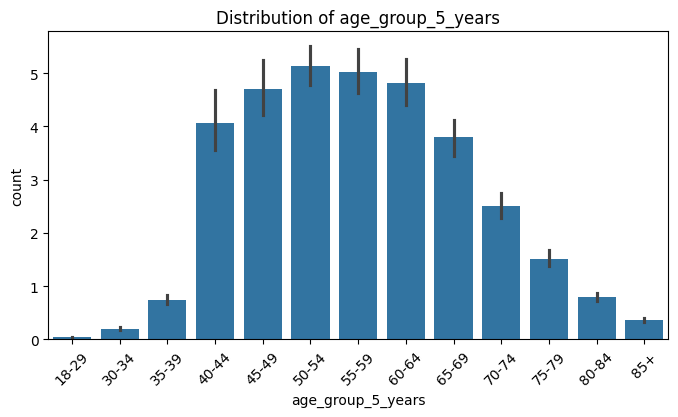

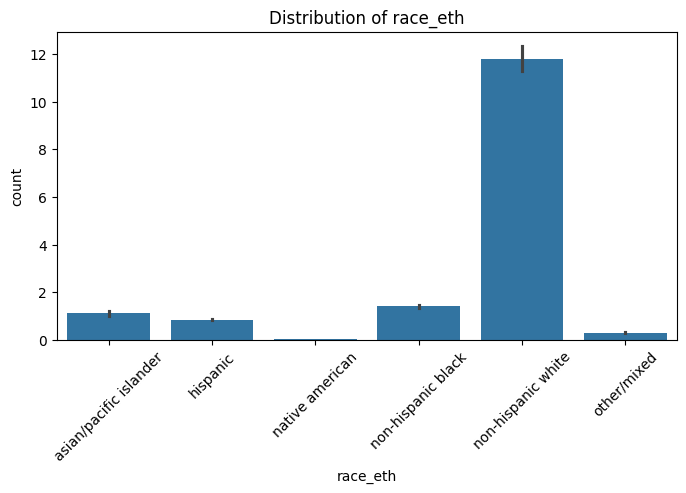

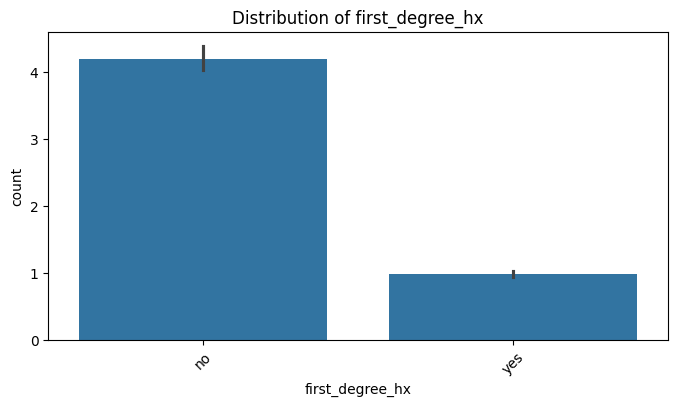

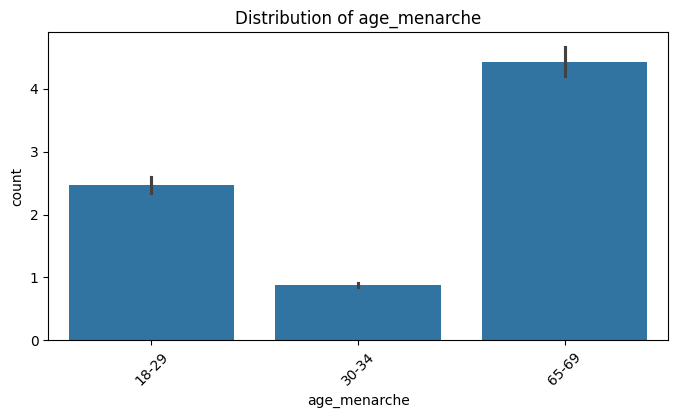

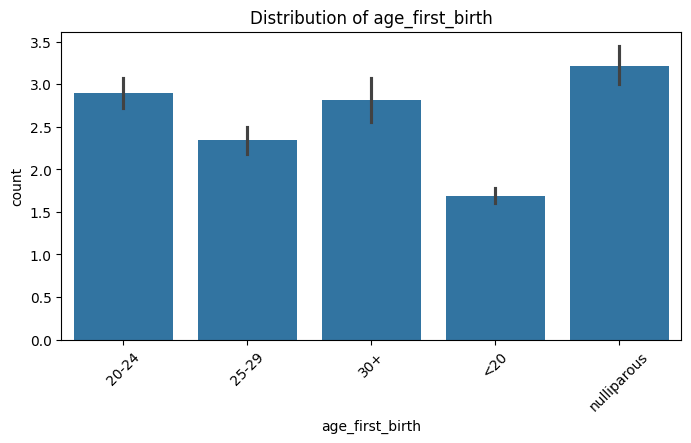

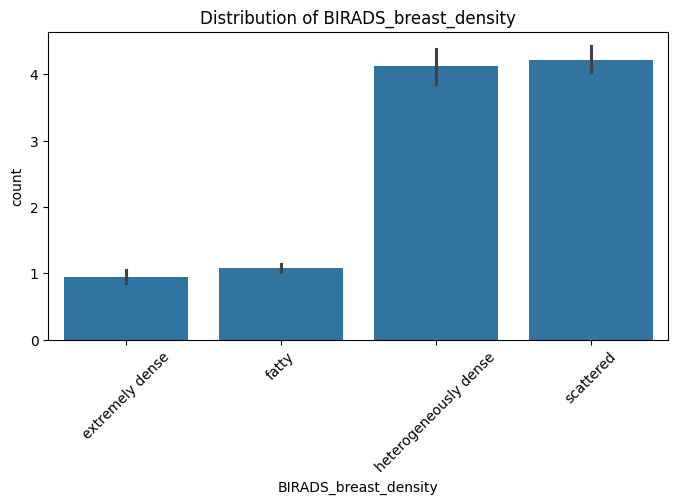

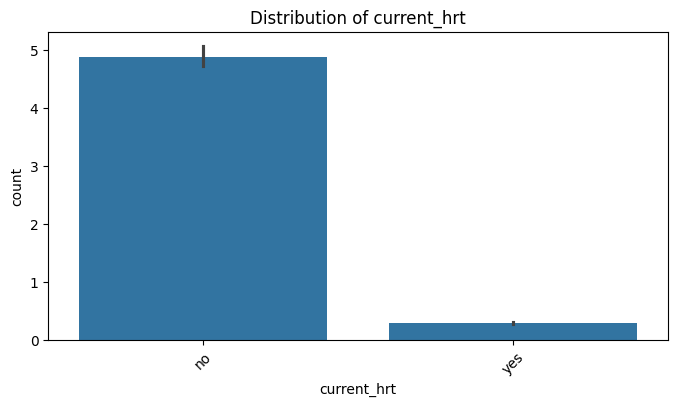

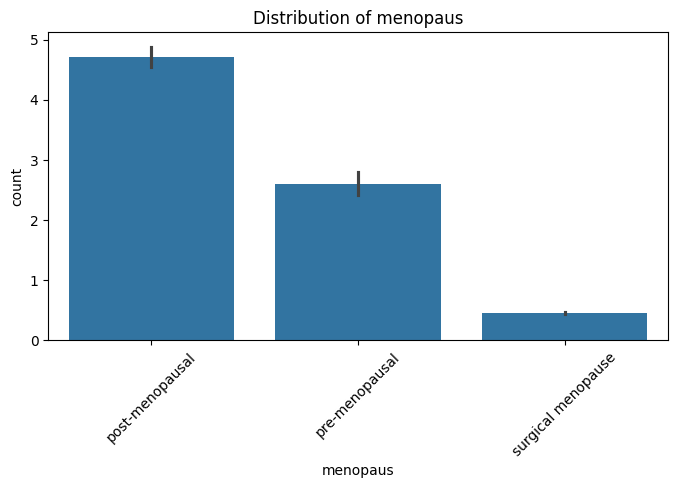

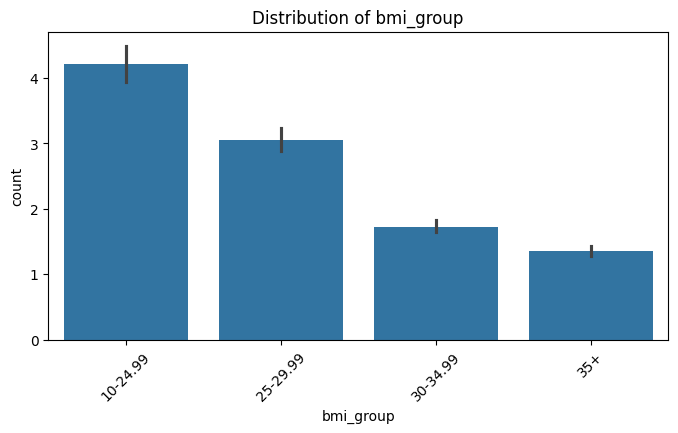

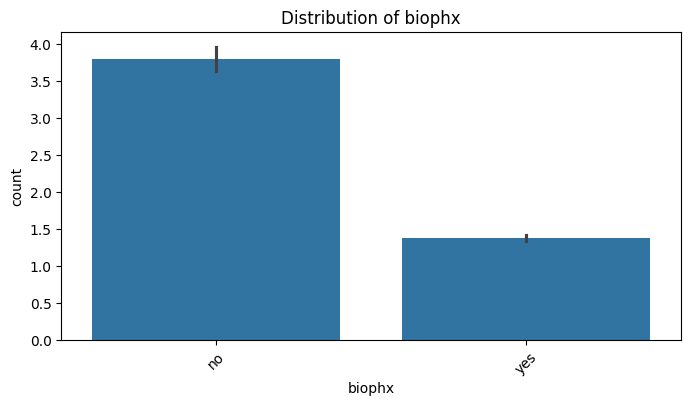

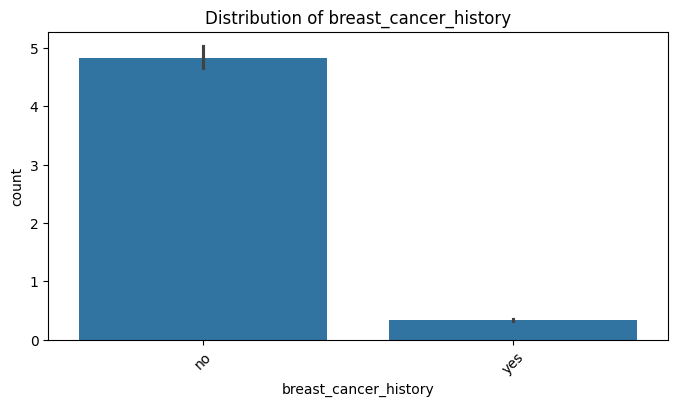

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned_agg = df_cleaned.groupby(cat_cols, as_index=False)['count'].sum()
display(df_cleaned_agg.head())

for var in cat_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(data=df_cleaned_agg, x=var, y='count')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {var}')
    plt.show()



Distribution de base, observer s'il y a des catégories qui dominent ou des déséquilibres (beaucoup de femmes post ménopausées,...)

In [ ]:
#calcul proportion femme avec densité mammaire élevée et proportion femme avec un antécédent de cancer
p_birads_high = (df_cleaned['BIRADS_high'] * df_cleaned['count']).sum() / df_cleaned['count'].sum()
p_history = (df_cleaned['breast_cancer_history_bin'] * df_cleaned['count']).sum() / df_cleaned['count'].sum()
print(f'Proportion with high breast density : {p_birads_high:.2%}')
print(f'Proportion with prior breast cancer : {p_history:.2%}')

Proportion with high breast density : 48.88%
Proportion with prior breast cancer : 6.63%


/tmp/ipython-input-4224989659.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_age = df_cleaned.groupby('age_group_5_years').apply(
/tmp/ipython-input-4224989659.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_age = df_cleaned.groupby('age_group_5_years').apply(
/tmp/ipython-input-4224989659.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the

<function matplotlib.pyplot.show(close=None, block=None)>

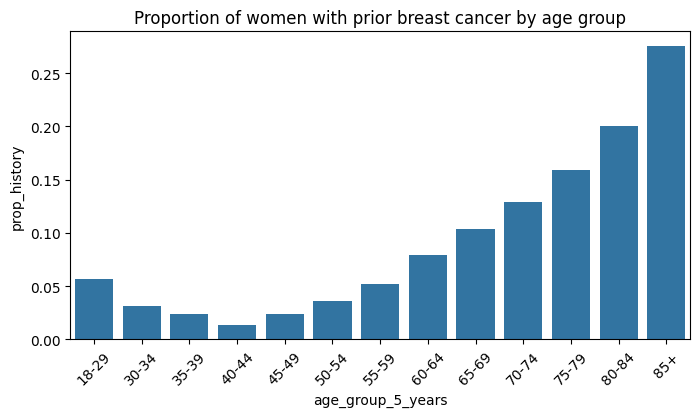

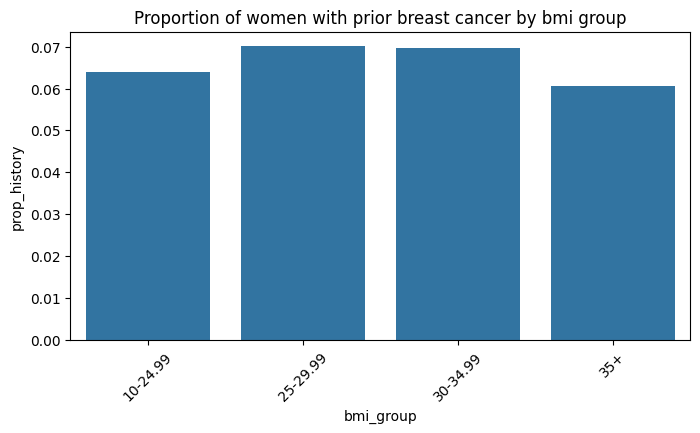

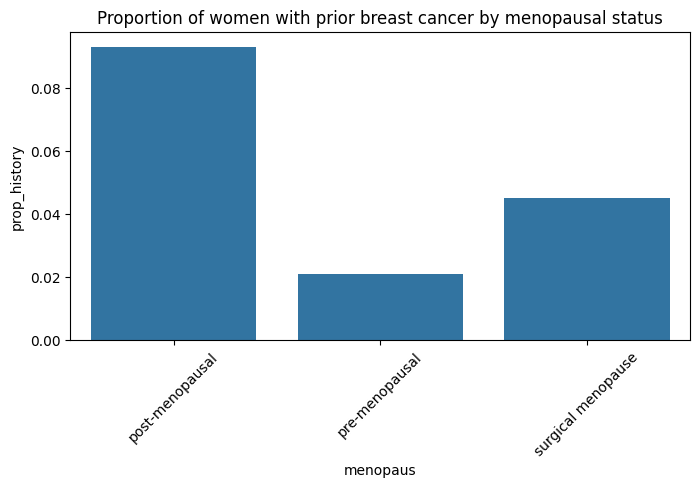

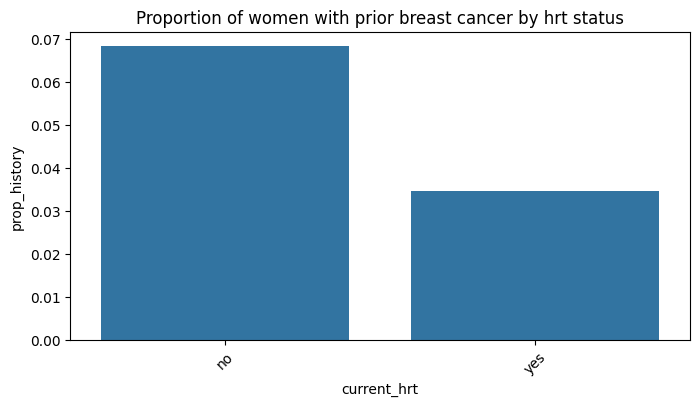

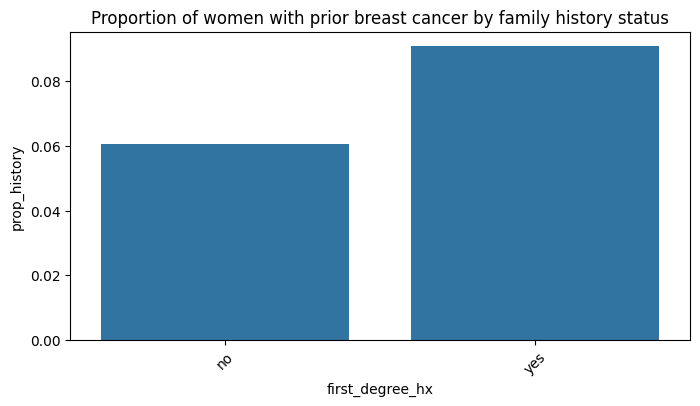

In [ ]:
#Maintenant on veut voir comment les variables explicatives influencent les deux variables cibles (breast_cancer_hisotry et BIRADS_high)
#on peut regarder par exemple, comment l'âge influence la breast_cancer_history
pivot_age = df_cleaned.groupby('age_group_5_years').apply(
    lambda x: (x['breast_cancer_history_bin']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_age, x='age_group_5_years',y='prop_history')
plt.xticks(rotation=45)
plt.title('Proportion of women with prior breast cancer by age group')
plt.show

#on reproduit ça avec des autres variables
pivot_bmi = df_cleaned.groupby('bmi_group').apply(
    lambda x: (x['breast_cancer_history_bin']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_bmi, x='bmi_group',y='prop_history')
plt.xticks(rotation=45)
plt.title('Proportion of women with prior breast cancer by bmi group')
plt.show

pivot_menopaus = df_cleaned.groupby('menopaus').apply(
    lambda x: (x['breast_cancer_history_bin']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_menopaus, x='menopaus',y='prop_history')
plt.xticks(rotation=45)
plt.title('Proportion of women with prior breast cancer by menopausal status')
plt.show

pivot_hrt = df_cleaned.groupby('current_hrt').apply(
    lambda x: (x['breast_cancer_history_bin']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_hrt, x='current_hrt',y='prop_history')
plt.xticks(rotation=45)
plt.title('Proportion of women with prior breast cancer by hrt status')
plt.show

pivot_family = df_cleaned.groupby('first_degree_hx').apply(
    lambda x: (x['breast_cancer_history_bin']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_family, x='first_degree_hx',y='prop_history')
plt.xticks(rotation=45)
plt.title('Proportion of women with prior breast cancer by family history status')
plt.show

/tmp/ipython-input-36317211.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_age_BIRADS = df_cleaned.groupby('age_group_5_years').apply(
/tmp/ipython-input-36317211.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_age_BIRADS = df_cleaned.groupby('age_group_5_years').apply(
/tmp/ipython-input-36317211.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

<function matplotlib.pyplot.show(close=None, block=None)>

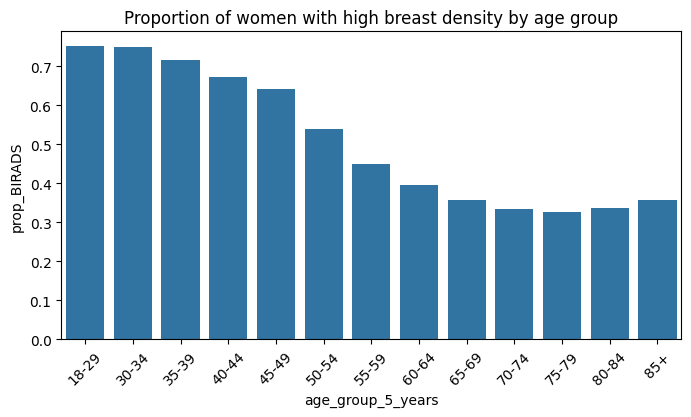

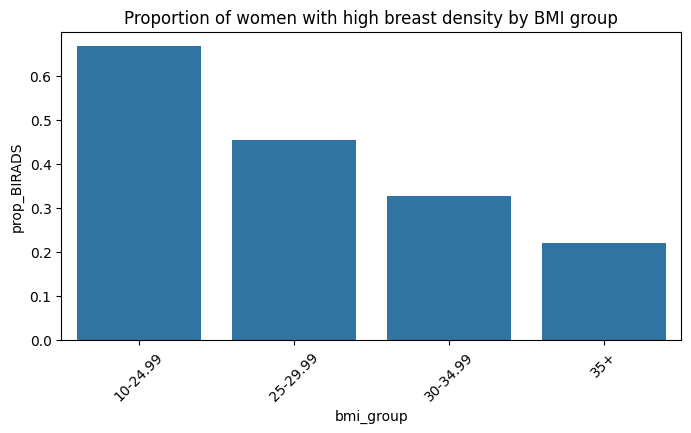

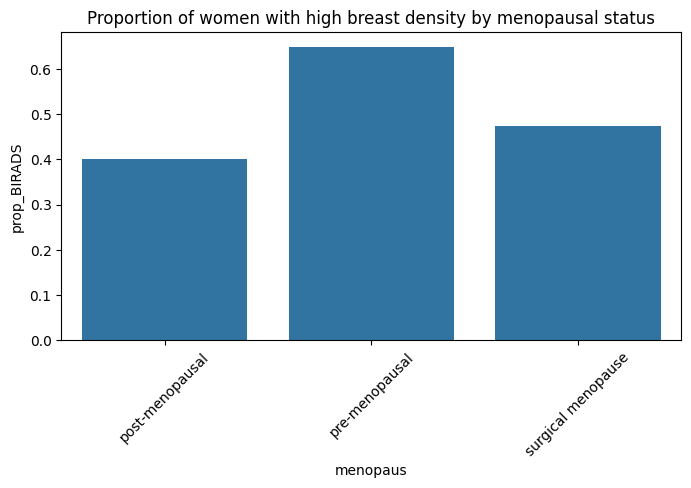

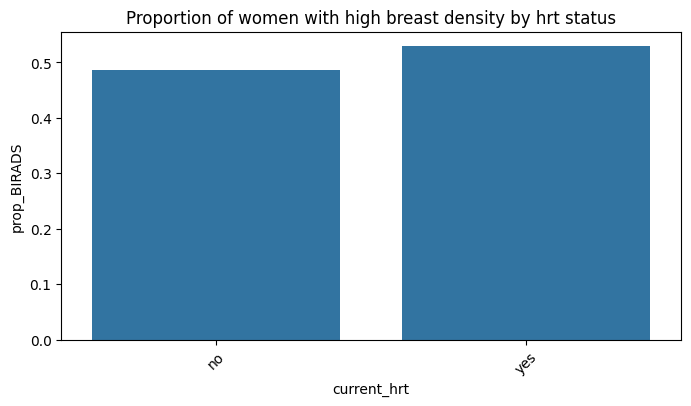

In [ ]:
#on fait pareil pour regarder l'influence des variables sur BIRADS_high
pivot_age_BIRADS = df_cleaned.groupby('age_group_5_years').apply(
    lambda x: (x['BIRADS_high']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_BIRADS_high')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_age_BIRADS, x='age_group_5_years',y='prop_BIRADS_high')
plt.xticks(rotation=45)
plt.title('Proportion of women with high breast density by age group')
plt.show

pivot_bmi_BIRADS = df_cleaned.groupby('bmi_group').apply(
    lambda x: (x['BIRADS_high']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_BIRADS_high')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_bmi_BIRADS, x='bmi_group',y='prop_BIRADS_high')
plt.xticks(rotation=45)
plt.title('Proportion of women with high breast density by BMI group')
plt.show

pivot_menopaus_BIRADS = df_cleaned.groupby('menopaus').apply(
    lambda x: (x['BIRADS_high']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_BIRADS_high')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_menopaus_BIRADS, x='menopaus',y='prop_BIRADS_high')
plt.xticks(rotation=45)
plt.title('Proportion of women with high breast density by menopausal status')
plt.show

pivot_hrt_BIRADS = df_cleaned.groupby('current_hrt').apply(
    lambda x: (x['BIRADS_high']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_BIRADS_high')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_hrt_BIRADS, x='current_hrt',y='prop_BIRADS_high')
plt.xticks(rotation=45)
plt.title('Proportion of women with high breast density by hrt status')
plt.show

pivot_family_BIRADS = df_cleaned.groupby('first_degree_hx').apply(
    lambda x: (x['BIRADS_high']*x['count']).sum() / x['count'].sum()
).reset_index(name='prop_BIRADS_high')

plt.figure(figsize=(8,4))
sns.barplot(data=pivot_family_BIRADS, x='first_degree_hx',y='prop_BIRADS_high')
plt.xticks(rotation=45)
plt.title('Proportion of women with high breast density by family history status')
plt.show

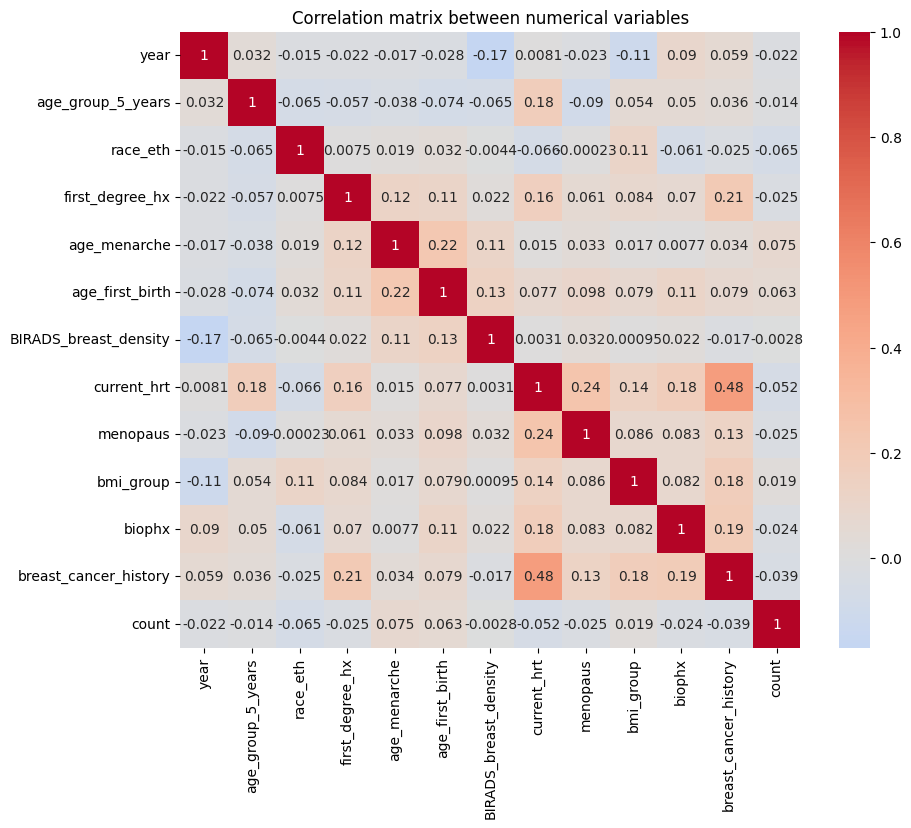

In [ ]:
corr = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between numerical variables')
plt.show()

Corrélations globalement faibles => pas de multicolinéarité forte entre les variables encodées, donc on peut utiliser ces variables pour faire des régressions

corrélations à noter :

*   current_hrt et menopaus : l'hormonothérapie est liée à la ménopause
*   current_hrt et breast_cancer_history : assez élevé, certaines femmes ayant eu un cancer ont pu suivre un traitement hormonal
*  first_degree_hx et breast_cancer_history : antécédents familiaux corrélés aux antécédents personnels
*   age_menarche et age_first_birth : légère corrélation biologique logique






/tmp/ipython-input-168532995.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_BIRADS = df_cleaned.groupby('year').apply(
/tmp/ipython-input-168532995.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trend_history = df_cleaned.groupby('year').apply(


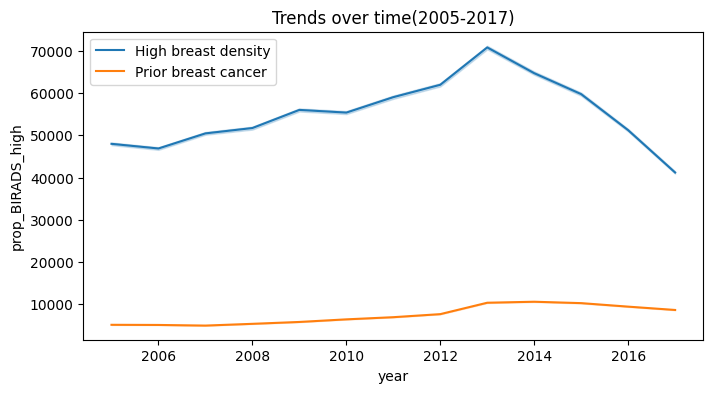

In [ ]:
#voir si il y a des tendances dans le temps
trend_BIRADS = df_cleaned.groupby('year').apply(
    lambda x: (x['BIRADS_high'] * x['count']).sum() / x['count']
).reset_index(name='prop_BIRADS_high')

trend_history = df_cleaned.groupby('year').apply(
    lambda x: (x['breast_cancer_history_bin'] * x['count']).sum() / x['count']
).reset_index(name='prop_history')

plt.figure(figsize=(8,4))
sns.lineplot(data=trend_BIRADS, x='year',y='prop_BIRADS_high', label = 'High breast density')
sns.lineplot(data=trend_history, x='year', y='prop_history', label = 'Prior breast cancer')
plt.title('Trends over time(2005-2017)')
plt.legend()
plt.show()